Best K: 17
Accuracy: 0.90


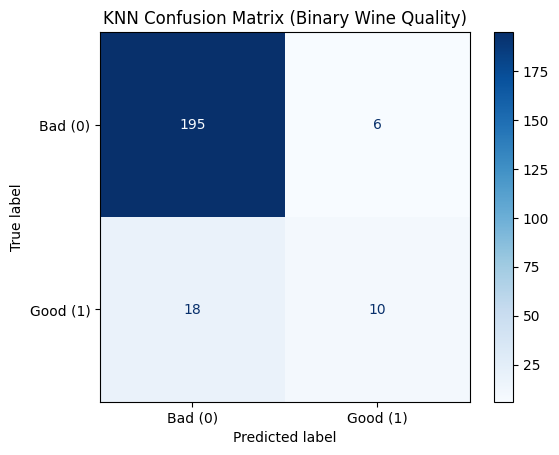

In [11]:
# knn_wine_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("WineQT1.csv")
df.dropna(inplace=True)

# Convert quality to binary (Good: quality >= 7)
df["quality_binary"] = df["quality"].apply(lambda x: 1 if x >= 7 else 0)

# Features and labels
X = df.drop(["quality", "quality_binary"], axis=1)
y = df["quality_binary"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tune k
best_k = 1
best_acc = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    if acc > best_acc:
        best_k = k
        best_acc = acc

print(f"Best K: {best_k}")
print(f"Accuracy: {best_acc:.2f}")

# Train with best_k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad (0)", "Good (1)"])
disp.plot(cmap="Blues")
plt.title("KNN Confusion Matrix (Binary Wine Quality)")
plt.show()
